<img src="https://wallpapercave.com/wp/wp4189939.jpg" width=600px height="auto"/>

<center><h1>Recommendation place to build a hotel in Yogyakarta, Indonesia</h1></center>


<h2>Introduction</h2>


Yogyakarta is one of the famous cities in Indonesia which is located in Central Java and often by many visitors both local visitors or foreign visitors especially during holidays the hotel occupancy can boost to significant number, based on <a href="https://www.medcom.id/english/food-travel/ybJVX3nb-hotel-occupancy-in-yogya-reaches-90-during-eid-holiday-season-phri">this</a> article, the Association of Indonesian Hotels and Restaurants (PHRI) in the Special Region of Yogyakarta estimates that occupancy rates of star hotels in this area will reach 90 percent during Eid 2019, this may become a good profit to build a new hotel at strategic places in Yogyakarta


When thinking about a straategic place we need to considering some factors to make the hotel are well placed to catch visitors, the 2 main factors are including:
- **Rival** considering the number of hotel already place in a neighborhood is important because we don't want to build a hotel with lot of another hotel there
- ***Location*** location are crucial factor to be considered because a location with low number of venue may make the visitors are not interested for staying in our hotel because there will be not many visitor go to that place

<h2>Business Problem</h2>


As the number of Yogyakarta popularity increases, the number of hotel in Yogyakarta are also increases, a strategy are needed to make the hotel are well placed in a strategic location to prevent the risk of loss. The goal for this project is to select best location to build a hotel and give an insight about the hotel and venue distribution by clustering the hotel using K-means and mapping the clustered hotel and number of venue in a folium map therefore we can choose where is the best place to build the hotel 

<h2>Data Sources</h2>


The problem for this project are there are no dataset of list of neighborhood in yogyakarta city document therefore i need to scrape a website and covert it into a dataframe. However the website are not containing latitude and longitude for each neighborhood, a library called Nominatom are needed to obtain the coordinates based on the neighborhood name. You can see the website source <a href="http://www.organisasi.org/1970/01/daftar-nama-kecamatan-kelurahan-desa-kodepos-di-kota-kabupaten-yogyakarta-di-yogyakarta-jogja.html">Here</a>

***Importing Library***

In [34]:
import re
import requests
import json
import pandas as pd
import numpy as np
import folium
import geocoder
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from geopy.exc import GeocoderTimedOut
from bs4 import BeautifulSoup as bs
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from geopy.geocoders import Nominatim

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

We need to define some function to extract data from the webpage

In [2]:
def extractDistrict(content):
    yogya_column = []
    
    #Regex to extraxt text
    yogya_name = re.findall(r'(\d+\.\s.*\n)', content)
    
    for name in yogya_name:
        name = re.findall(r'\s.*', name)[0]
        name = name.strip().split(' ')
        yogya_column.append(name[1])
    
    return yogya_column

In [3]:
def extractNeighbor(content):
    neighbor_column = []
    #Regex to extraxt text
    neighbor_content = re.findall(r'[-]\s.*', content)
    
    for item in neighbor_content:
        neighbor_name = item.split(' ')
        
        if neighbor_name[3].startswith('('):
            neighbor_column.append(neighbor_name[2])
        else:
            name = neighbor_name[2] + ' ' + neighbor_name[3]
            neighbor_column.append(name)
            
    #return list excluding 2 last item
    return neighbor_column[:-2]

In [4]:
def extractPost(content):
    post_column = []
    #Regex to extraxt number insed parenthesees
    post_code = re.findall(r'(\d+)', content)
    
    for code in post_code:
        if len(code) == 5:
            post_column.append(code)
    return post_column

Now let's parse the webpage using BeautifulSoup4

In [5]:
yogyakarta_url = requests.get('http://www.organisasi.org/1970/01/daftar-nama-kecamatan-kelurahan-desa-kodepos-di-kota-kabupaten-yogyakarta-di-yogyakarta-jogja.html')
yogya_soup = bs(yogyakarta_url.text, 'html.parser')
yogya_column = []
neighbor_column = []
post_column = []

if yogyakarta_url.status_code == 200:
    yogya_content = yogya_soup.find_all('div', class_='field-item')[0].text
    yogya_column = extractDistrict(yogya_content)
    neighbor_column = extractNeighbor(yogya_content)
    post_column = extractPost(yogya_content)

print('Total district in yogyakarta', len(yogya_column))
print('Total neighborhood in yogyakarta', len(neighbor_column))
print('Total postal code in yogyakarta', len(post_column))

Total district in yogyakarta 14
Total neighborhood in yogyakarta 45
Total postal code in yogyakarta 45


In [6]:
columns = ['Neighborhood', 'Postal Code']
df = pd.DataFrame(columns=columns)
df.head()

,Neighborhood,Postal Code


In [7]:
for neighbor, post in zip(neighbor_column, post_column):
    #Appending postal code and neighborhood into a dataframe
    df = df.append({'Neighborhood': neighbor,
                   'Postal Code': post}, ignore_index=True)

print(df.shape)

(45, 2)


To extract the latitude and lognitude using postal code we will use geocoder since nominatim are often time out

In [8]:
lat = []
lng = []

def get_latlng():
    lat_lng_coords = None
    
    for post in df['Neighborhood']:
        g = geocoder.arcgis('%s, Yogyakarta City, Yogyakarta' % (post))
        lat_lng_coords = g.latlng
        lat.append(lat_lng_coords[0]) 
        lng.append(lat_lng_coords[1])
        print(post, 'done!', end='|')

get_latlng()

Bausasran done!|Tegal Panggung done!|Suryatmajan done!|Sosromenduran done!|Pringgokusuman done!|Demangan done!|Klitren done!|Terban done!|Kotabaru done!|Baciro done!|Prawirodirjan done!|Ngupasan done!|Bumijo done!|Gowongan done!|Cokrodiningratan done!|Rejowinangun done!|Prenggan done!|Purbayan done!|Panembahan done!|Kadipaten done!|Patehan done!|Suryodiningratan done!|Gedongkiwo done!|Mantrijeron done!|Wirogunan done!|Keparakan done!|Brontokusuman done!|Ngampilan done!|Notoprajan done!|Gunung Ketur done!|Purwo Kinanti done!|Karangwaru done!|Kricak done!|Bener done!|Tegalrejo done!|Pandeyan done!|Sorosutan done!|Giwangan done!|Warungboto done!|Muja Muju done!|Semaki done!|Tahunan done!|Patangpuluhan done!|Wirobrajan done!|Pakuncen done!|

In [9]:
df['lat'] = lat
df['lng'] = lng

print(df.shape)
df.head()

#Save the data to csv files
df.to_csv('yogya_post.csv', index=False)

(45, 4)


In [10]:
#Get latitude and longitude for yogyakarta city
yogya = geocoder.arcgis('Yogyakarta City, Yogyakarta')
yogya_lat_lng = yogya.latlng
yogya_lat = yogya_lat_lng[0]
yogya_lng = yogya_lat_lng[1]

print(yogya_lat, yogya_lng)

-7.803709999999967 110.37480000000005


Now let's visualize it using folium map

In [11]:
map_to = folium.Map(location=[yogya_lat, yogya_lng], zoom_start=13)

for nlat, nlng, neighborhood in zip(df['lat'], df['lng'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [nlat, nlng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_to)  
    
map_to

Fouraquare API are needed to get list of venues available in a neighborhood by passing its latitude and longitude within radius 1 kilometre

In [12]:
CLIENT_ID = 'Your ID' # your Foursquare ID
CLIENT_SECRET = 'Your Secret Id' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [13]:
venues_list=[]
    
for name, lat, lng in zip(df['Neighborhood'], df['lat'], df['lng']):
            
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, lat, lng, 1000, 100)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    venues_list.append([(name, lat, lng, 
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],  
        v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                'Neighborhood Latitude', 
                'Neighborhood Longitude', 
                'Venue', 'Venue Latitude', 
                'Venue Longitude', 'Venue Category']
    
    print(name, "Done!", end=" | ")

nearby_venues.head()

Bausasran Done! | Tegal Panggung Done! | Suryatmajan Done! | Sosromenduran Done! | Pringgokusuman Done! | Demangan Done! | Klitren Done! | Terban Done! | Kotabaru Done! | Baciro Done! | Prawirodirjan Done! | Ngupasan Done! | Bumijo Done! | Gowongan Done! | Cokrodiningratan Done! | Rejowinangun Done! | Prenggan Done! | Purbayan Done! | Panembahan Done! | Kadipaten Done! | Patehan Done! | Suryodiningratan Done! | Gedongkiwo Done! | Mantrijeron Done! | Wirogunan Done! | Keparakan Done! | Brontokusuman Done! | Ngampilan Done! | Notoprajan Done! | Gunung Ketur Done! | Purwo Kinanti Done! | Karangwaru Done! | Kricak Done! | Bener Done! | Tegalrejo Done! | Pandeyan Done! | Sorosutan Done! | Giwangan Done! | Warungboto Done! | Muja Muju Done! | Semaki Done! | Tahunan Done! | Patangpuluhan Done! | Wirobrajan Done! | Pakuncen Done! | 

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bausasran,-7.79012,110.37804,Special Nasi Goreng Kambing Pak Sular,-7.788325,110.377191,Diner
1,Bausasran,-7.79012,110.37804,Nasi Goreng Sapi Kantor Notaris,-7.788377,110.377395,Food Truck
2,Bausasran,-7.79012,110.37804,Rumah Makan Baru,-7.787487,110.378596,Chinese Restaurant
3,Bausasran,-7.79012,110.37804,Nasi Pecel Madiun Khas Jatim Bu Is,-7.790014,110.379093,Breakfast Spot
4,Bausasran,-7.79012,110.37804,Erha Clinic,-7.785190,110.374183,Cosmetics Shop


We will print the venue category column in unique to make sure that there are  hotel within venue category

In [14]:
print(nearby_venues.shape)
nearby_venues['Venue Category'].unique()

(3483, 7)


array(['Diner', 'Food Truck', 'Chinese Restaurant', 'Breakfast Spot',
       'Cosmetics Shop', 'Bookstore', 'Market', 'Coffee Shop', 'Hostel',
       'Café', 'Music Venue', 'Ice Cream Shop', 'Art Gallery',
       'Indonesian Restaurant', 'Bakery', 'Hotel', 'Asian Restaurant',
       'Clothing Store', 'Pharmacy', 'Spa', 'Jazz Club',
       'Salon / Barbershop', 'Snack Place', 'Steakhouse', 'Gift Shop',
       'BBQ Joint', 'Dance Studio', 'Sporting Goods Shop',
       'Jewelry Store', 'Thai Restaurant', 'Pizza Place',
       'American Restaurant', 'Indonesian Meatball Place', 'Restaurant',
       'Supermarket', 'Soup Place', 'Hotel Bar', 'Department Store',
       'Donut Shop', 'Javanese Restaurant',
       'Vegetarian / Vegan Restaurant', 'German Restaurant',
       'Food & Drink Shop', 'Stadium', 'Boutique', 'Shopping Mall',
       'Burger Joint', 'Fast Food Restaurant', 'Government Building',
       'Rental Car Location', 'Bar', 'Noodle House', 'Concert Hall',
       'Pool', 'Castle',

K-Means clustering cannot deal with categorical values, therefore, we need to change it into binarical values or we can call it one hot encoding

In [15]:
yogya_onehot = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")
yogya_onehot['Neighborhood'] = nearby_venues['Neighbourhood']

index = yogya_onehot.columns.get_loc("Neighborhood")
fixed_columns = [yogya_onehot.columns[index]] + list(yogya_onehot.columns[:index])

yogya_onehot = yogya_onehot[fixed_columns]
yogya_onehot.head()

,Neighborhood,Acehnese Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Stadium,Batik Shop,Beach,Bed & Breakfast,Beer Garden,Betawinese Restaurant,Bistro,Bookstore,Boutique,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,Café,Camera Store,Candy Store,Castle,Cemetery,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Stadium,Community College,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Department Store,Design Studio,Dessert Shop,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Event Space,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Government Building,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,High School,Historic Site,History Museum,Hospital,Hostel,Hotel,Hotel Bar,Housing Development,Ice Cream Shop,Indian Restaurant,Indonesian Meatball Place,Indonesian Restaurant,Internet Cafe,Italian Restaurant,Japanese Restaurant,Javanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Lounge,Manadonese Restaurant,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mosque,Motel,Movie Theater,Multiplex,Museum,Music Store,Music Venue
0,Bausasran,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bausasran,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bausasran,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bausasran,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bausasran,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
#Find the mean value of venue category based on neighborhood
yogya_group = yogya_onehot.groupby('Neighborhood').mean().reset_index()
yogya_group.head()

,Neighborhood,Acehnese Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Stadium,Batik Shop,Beach,Bed & Breakfast,Beer Garden,Betawinese Restaurant,Bistro,Bookstore,Boutique,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,Café,Camera Store,Candy Store,Castle,Cemetery,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Stadium,Community College,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Department Store,Design Studio,Dessert Shop,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Event Space,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Government Building,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,High School,Historic Site,History Museum,Hospital,Hostel,Hotel,Hotel Bar,Housing Development,Ice Cream Shop,Indian Restaurant,Indonesian Meatball Place,Indonesian Restaurant,Internet Cafe,Italian Restaurant,Japanese Restaurant,Javanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Lounge,Manadonese Restaurant,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mosque,Motel,Movie Theater,Multiplex,Museum,Music Store,Music Venue
0,Baciro,0.000000,0.012821,0.0,0.00,0.0,0.0,0.141026,0.0,0.025641,0.0,0.012821,0.000000,0.012821,0.0,0.0,0.000000,0.000000,0.012821,0.0,0.00,0.00,0.012821,0.0,0.0,0.000000,0.012821,0.0,0.0,0.012821,0.0,0.038462,0.000000,0.0,0.038462,0.0,0.0,0.0,0.0,0.012821,0.012821,0.0,0.000000,0.012821,0.012821,0.00,0.000000,0.038462,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.025641,0.00,0.064103,0.000000,0.012821,0.000000,0.0,0.012821,0.00,0.00,0.00,0.0,0.000000,0.012821,0.000000,0.0,0.0,0.0,0.000000,0.0,0.012821,0.038462,0.012821,0.000000,0.025641,0.0,0.00,0.064103,0.0,0.000000,0.0,0.012821,0.00,0.00,0.000000,0.0,0.0,0.012821,0.0,0.012821,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.012821
1,Bausasran,0.000000,0.010000,0.0,0.01,0.0,0.0,0.060000,0.0,0.020000,0.0,0.030000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.02,0.02,0.020000,0.0,0.0,0.010000,0.040000,0.0,0.0,0.000000,0.0,0.030000,0.010000,0.0,0.060000,0.0,0.0,0.0,0.0,0.000000,0.030000,0.0,0.000000,0.010000,0.020000,0.00,0.000000,0.030000,0.01,0.00,0.000000,0.0,0.000000,0.010000,0.0,0.0,0.000000,0.0,0.010000,0.00,0.070000,0.000000,0.000000,0.000000,0.0,0.000000,0.01,0.01,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.010000,0.040000,0.010000,0.000000,0.020000,0.0,0.01,0.070000,0.0,0.000000,0.0,0.010000,0.01,0.01,0.000000,0.0,0.0,0.000000,0.0,0.010000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.010000
2,Bener,0.020408,0.000000,0.0,0.00,0.0,0.0,0.040816,0.0,0.000000,0.0,0.061224,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.020408,0.0,0.0,0.020408,0.020408,0.0,0.0,0.000000,0.0,0.061224,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.020408,0.000000,0.0,0.000000,0.000000,0.020408,0.00,0.020408,0.020408,0.00,0.00,0.020408,0.0,0.000000,0.000000,0.0,0.0,0.020408,0.0,0.020408,0.00,0.000000,0.000000,0.000000,0.020408,0.0,0.000000,0.00,0.00,0.00,0.0,0.020408,0.000000,0.020408,0.0,0.0,0.0,0.020408,0.0,0.000000,0.020408,0.000000,0.020408,0.020408,0.0,0.00,0.163265,0.0,0.000000,0.0,0.000000,0.00,0.00,0.020408,0.0,0.0,0.000000,0.0,0.000000,0.020408,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
3,Brontokusuman,0.000000,0.000000,0.0,0.00,0.0,0.0,0.053191,0.0,0.010638,0.0,0.042553,0.031915,0.000000,0.0,0.0,0.021277,0.021277,0.000000,0.0,0.00,0.00,0.010638,0.0,0.0,0.000000,0.0

In [17]:
yogya_hotel = yogya_group[['Neighborhood', 'Hotel']]
yogya_hotel.head()

,Neighborhood,Hotel
0,Baciro,0.038462
1,Bausasran,0.040000
2,Bener,0.020408
3,Brontokusuman,0.138298
4,Bumijo,0.190000


***Clustering***

In [37]:
#Set number of clusters
k = range(2, 14)
sil = []
yogya_cluster = yogya_hotel.drop('Neighborhood', axis=1)

for K in k:
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(yogya_cluster)
    labels = kmeans.labels_
    sil.append(silhouette_score(yogya_cluster, labels, metric='euclidean'))

array([ 2,  2,  5,  1,  3,  1, 11,  5, 10,  6])

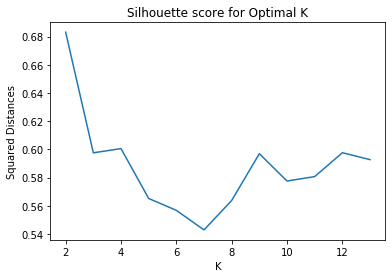

In [52]:
plt.plot(k, sil)
plt.xlabel('K')
plt.ylabel('Squared Distances')
plt.title('Silhouette score for Optimal K')
plt.show()

In [45]:
K = 4
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(yogya_cluster)
labels = kmeans.labels_

In [40]:
yogya_copy = yogya_hotel.copy()
yogya_copy['Clusters'] = kmeans.labels_
yogya_copy.head()

,Neighborhood,Hotel,Clusters
0,Baciro,0.038462,2
1,Bausasran,0.040000,2
2,Bener,0.020408,2
3,Brontokusuman,0.138298,3
4,Bumijo,0.190000,1


In [41]:
yogya_hotel_count = nearby_venues[nearby_venues['Venue Category'] == 'Hotel'].groupby('Neighbourhood').count().reset_index()
yogya_hotel_count = yogya_hotel_count[['Neighbourhood', 'Venue']]
yogya_hotel_count.rename(columns={'Venue': 'Hotel Count'}, inplace=True)

In [42]:
yogya_copy = yogya_copy.join(df.set_index('Neighborhood'), on='Neighborhood', how='left')
yogya_copy = yogya_copy.join(yogya_hotel_count.set_index('Neighbourhood'), on='Neighborhood', how='left')

yogya_copy.sort_values(['Clusters'], inplace=True)
yogya_copy.replace(np.nan, 0, inplace=True)
yogya_copy.drop('Postal Code', axis=1, inplace=True)

yogya_copy.head()

,Neighborhood,Hotel,Clusters,lat,lng,Hotel Count
22,Pakuncen,0.080645,0,-7.79641,110.35280,5.0
41,Terban,0.080000,0,-7.77728,110.37379,8.0
40,Tegalrejo,0.081395,0,-7.77546,110.36034,7.0
31,Purwo Kinanti,0.050000,0,-7.79910,110.37311,5.0
27,Prawirodirjan,0.060000,0,-7.80443,110.36939,6.0


***Visualize the clustered data into a folium map***

In [51]:
map_to = folium.Map(location=[yogya_lat, yogya_lng], zoom_start=13)

x = np.arange(K)
ys = [i + x + (i*x)**2 for i in range(K)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for nlat, nlng, neighborhood, clus, cnt in zip(yogya_copy['lat'], yogya_copy['lng'], 
                                          yogya_copy['Neighborhood'], yogya_copy['Clusters'], 
                                                      yogya_copy['Hotel Count']):
    label = folium.Popup(str(neighborhood) + ', Cluster ' + str(clus) + ', Hotel Count ' + str(cnt), 
                         parse_html=True, max_width=100,min_width=300)
    
    folium.CircleMarker(
        [nlat, nlng],
        radius=5,
        popup=label,
        color=rainbow[int(clus)-1],
        fill=True,
        fill_color=rainbow[int(clus)-1],
        fill_opacity=0.7).add_to(map_to)  

cluster_0 = yogya_copy.loc[yogya_copy['Clusters'] == 0]['Hotel Count'].sum()
cluster_1 = yogya_copy.loc[yogya_copy['Clusters'] == 1]['Hotel Count'].sum()
cluster_2 = yogya_copy.loc[yogya_copy['Clusters'] == 2]['Hotel Count'].sum()
cluster_3 = yogya_copy.loc[yogya_copy['Clusters'] == 3]['Hotel Count'].sum()

total_venue = pd.DataFrame(columns=['Cluster', 'Hotel Count'])
venue_counts = [cluster_0, cluster_1, cluster_2, cluster_3]

for cluster in range(4):
    total_venue = total_venue.append({
        'Cluster': 'Cluster %s' %(cluster),
        'Hotel Count': venue_counts[cluster]
    }, ignore_index=True)

print(total_venue.sort_values('Hotel Count', ascending=False))
map_to

     Cluster  Hotel Count
0  Cluster 0         96.0
1  Cluster 1         74.0
3  Cluster 3         68.0
2  Cluster 2         32.0


***Conclusion***


From the data above, we know that cluster 0 (Red) are having biggest number of hotel built, and on the other side, neighborhood within cluster 2 (Green) are having lesser hotel built, this is happening because the hotel in cluster 1 are placed in the strategic places like near famous spot, have easy access to famous spot or because the area are near to a university and yogyakarta are known as student city because there are lot of university and yogyakarta and the student are come from various districts or even different island, therefore, it can be a potential place to build a hotel. However, i have recommendation to build a hotel, in semaki (cluster 2) there are only 2 hotels built and the area are near to Universitas Gajah Mada and Mandala Krida Stadion which may become potential place to build new hotel

**Recommendation:** Semaki (Cluster 2)